In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from matplotlib.colors import LogNorm

In [2]:
pd.set_option('display.max_columns', 500)

In [24]:
FILE_NAME = 'data/fastn_20runs.pkl'
df = pd.read_pickle(FILE_NAME)

In [25]:
df.head()

,gtid,mcid,subid,inner_hit,inner_hit_prev,id_plus_dr_hit,veto_hit,veto_plus_dr_hit,veto_hit_prev,pe,innerPE,vetoPE,n9,n9_prev,nOff,n100,n100_prev,n400,n400_prev,nX,nX_prev,good_pos,good_pos_prev,good_dir,good_dir_prev,x,y,z,t,u,v,w,azimuth_ks,azimuth_ks_prev,distpmt,mc_energy,mcx,mcy,mcz,mct,mcu,mcv,mcw,closestPMT,closestPMT_prev,dxPrevx,dyPrevy,dzPrevz,drPrevr,drPrevrQFit,dxmcx,dymcy,dzmcz,drmcr,dt_sub,dt_prev_us,timestamp,num_tested,best_like,worst_like,average_like,average_like_05m
0,1,77,0,37,0,45,0,0,0,81.079506,81.079509,0.0,27.0,0.0,0.0,35.0,0.0,36.0,0.0,27.0,0.0,0.745488,0.000000,0.565031,0.000000,4793.539124,-3592.344971,2080.774231,24.468445,-0.451889,0.827246,-0.333857,0.441010,0.000000,-340.196668,287.725739,4967.026247,1837.047439,10769.293046,0.000000,-0.091876,-0.595951,-0.797747,-290.238703,0.000000,0.000000,0.000000,0.000000,0.000000,-999999.99,-173.487123,-5429.392410,-8688.518816,10246.890208,36.770439,10022326.75,10022326.75,185,-30.763098,-140.152985,-84.431053,-88.599197
1,2,77,1,15,37,30,0,0,0,16.373993,16.373993,0.0,10.0,27.0,1.0,17.0,35.0,21.0,36.0,10.0,27.0,0.710270,0.745488,0.401876,0.565031,4199.989624,-1922.792969,6194.306641,-6.713318,0.118680,-0.175231,-0.977348,0.472049,0.441010,-505.763204,287.725739,4350.643609,-2161.083629,5417.351065,34.783146,-0.091876,-0.595951,-0.797747,-494.306641,-290.238703,-593.549500,1669.552002,4113.532410,4478.934447,-999999.99,-150.653985,238.290661,776.955576,826.522250,37656.093750,37.75,10022364.50,62,-65.969658,-98.963959,-70.794853,-73.378891
2,3,77,2,14,15,28,0,0,0,14.588472,14.588472,0.0,13.0,10.0,2.0,14.0,17.0,17.0,21.0,13.0,10.0,0.859298,0.710270,0.567786,0.401876,4648.385620,-3063.229980,3762.520142,-9.012817,-0.583614,-0.052561,0.810328,0.299567,0.472049,288.147636,287.725739,4350.643609,-2161.083629,5417.351065,34.783146,-0.091876,-0.595951,-0.797747,133.055884,-494.306641,448.395996,-1140.437012,-2431.786499,2723.094035,-999999.99,297.742011,-902.146351,-1654.830923,1908.136192,51840.121094,14.00,10022378.50,61,-60.551823,-86.671959,-67.411789,-69.374542
3,4,451,0,7,14,28,0,0,0,6.433372,6.433372,0.0,-999999.0,13.0,-999999.0,-999999.0,14.0,-999999.0,17.0,-999999.0,13.0,-999999.990000,0.859298,-999999.990000,0.567786,-999999.990000,-999999.990000,-999999.990000,-999999.990000,-999999.990000,-999999.990000,-999999.990000,-999999.990000,0.299567,-999999.990000,439.361633,-1859.238677,-9310.173422,4102.935583,0.000000,-0.091876,-0.595951,-0.797747,-999999.990000,133.055884,-999999.990000,-999999.990000,-999999.990000,-999999.990000,-999999.99,-999999.990000,-999999.990000,-999999.990000,-999999.990000,58549.078125,38040001.50,48062380.00,61,-60.551823,-86.671959,-67.411789,-69.374542
4,5,628,0,29,14,41,0,0,0,72.162010,72.162008,0.0,25.0,13.0,3.0,29.0,14.0,30.0,17.0,25.0,13.0,0.765670,0.859298,0.676193,0.567786,-4492.220154,2051.181030,-6065.180054,-1.856995,0.632741,0.000295,0.774364,0.375399,0.299567,-471.587296,306.553864,-5564.926561,5704.472228,-8118.916124,0.000000,-0.285561,-0.934060,0.214445,-365.180054,133.055884,-9140.605774,5114.411011,-9827.700195,14362.853652,-999999.99,1072.706407,-3653.291198,2053.736070,4326.091476,45.580326,59450131.75,69472510.25,169,-29.122473,-118.027809,-63.258865,-65.088196


### Clean out the non-constructed events

In [26]:
def clean_data(df):
    df_cleaned = df[df['azimuth_ks']>=0.]
    print('Initial events: %i\nAfter removing non-triggers: %i'%(len(df), len(df_cleaned)))
    return df_cleaned

In [27]:
df = clean_data(df)

Initial events: 1858
After removing non-triggers: 1599


Assuming dimensions of space (x, y, z, r) are in cm

## Dimensions

| Variable | Description | Units |
| --- | --- | --- |
| gtid | Event ID in frame | -- |
| mcid | Eveny ID in MC process | -- |
| subid | Sub-event id (0 is the first) | -- |
| inner_hit | Number of PMT hits from _inner detector_ | **Hits**: #triggered PMTs |
| inner_hit_prev | inner_hit from previous event <br> (same of all X_prev variables) | hits |
| id_plus_dr_hit | inner detector plus dark rate hits | hits |  
| veto_hit | # hits from veto PMTs | hits |
| veto_plus_dr_hit | # hits from veto PMTs + dark rate | hits | 
| pe | total area from all hits. formally, integrated charge of hits | PE (photoelectrons) | 
| innerPE | area from inner_hit | PE (photoelectrons) | 
| vetoPE | area from veto_hit | PE (photoelectrons) | 
| n9 | number of PMTs where prompt light was collected <br> have within a (+6ns and -3ns) residual time <br> from t0 (reconstructed vertex time) | residuals (like hits) |
| **nOff** | ?? | hits |
| n100 | 100ns window of residuals | residuals (hits) |
| n400 | 400ns window of residual PMTs | residuals (hits) |
| nX | variable prompt residual measurement | residuals (hits) |
| **good_dir** | some GOF on the direction of the cone? | ?? |
| **good_pos** | some GOF on the vertex position? | ?? |
| x, y, z | vertex (prompt?) (reconstructed) | mm |
| t | reconstructed vertex time | **ns?** |
| u, v, w | Cherenkov cone components (not well understood yet) | ?? |
| **azimuth_ks** | ks test on azimuthal measurement (isotropy) | -- |
| **distpmt** | proximity to PMT wall parallel to z-position of vertex | mm |
| closestPMT | proximity to PMT wall | mm |
| mc_energy | True Energy of infcoming particle (e.g. fast neutron) | MeV | 
| mcx, mcy, mcz | Truth position | mm |
| mct, mcu, mcv, mcw | Truth t, u, v, w variables | ns, -- |
| dxPrevx, dyPrevy, dzPrevz, drPrevr | difference in reco position between this and prev (sub-)event | mm |
| drPrevrQFit | diff in r position using QFit algo | mm |
| dxmcx, dxmcy, dxmcz, drmcr | diff in MC truth/reconstructed position | mm |
| dt_sub | time of the sub-event trigger from start of the event mc | us |
| dt_prev_us | time difference between last event | us | 
| timestamp | Time of event since run start | us? |
| num_tested | # tested points in the likelihood calc from BONSAI | -- |
| best_like | the best log-likelihood of the points | -- |
| worst_like | the worst log-likelihood of the points | -- |
| average_like | the average log-likelihood of the points | -- |
| average_like_05m | the average log likelihood excluding a 0.5m sphere around the best fit | -- |

In [12]:
print(df.keys())

Index(['gtid', 'mcid', 'subid', 'inner_hit', 'inner_hit_prev',
       'id_plus_dr_hit', 'veto_hit', 'veto_plus_dr_hit', 'veto_hit_prev', 'pe',
       'innerPE', 'vetoPE', 'n9', 'n9_prev', 'nOff', 'n100', 'n100_prev',
       'n400', 'n400_prev', 'nX', 'nX_prev', 'good_pos', 'good_pos_prev',
       'good_dir', 'good_dir_prev', 'x', 'y', 'z', 't', 'u', 'v', 'w',
       'azimuth_ks', 'azimuth_ks_prev', 'distpmt', 'mc_energy', 'mcx', 'mcy',
       'mcz', 'mct', 'mcu', 'mcv', 'mcw', 'closestPMT', 'closestPMT_prev',
       'dxPrevx', 'dyPrevy', 'dzPrevz', 'drPrevr', 'drPrevrQFit', 'dxmcx',
       'dymcy', 'dzmcz', 'drmcr', 'dt_sub', 'dt_prev_us', 'timestamp',
       'num_tested', 'best_like', 'worst_like', 'average_like',
       'average_like_05m'],
      dtype='object')


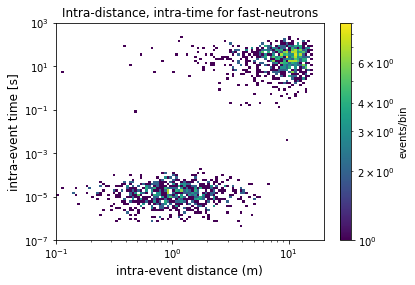

In [47]:
plt.hist2d(df['drPrevr']/1e3, df['dt_prev_us']/1e6, 
          bins=[np.logspace(-1,1.3,100), np.logspace(-7,3,100)], 
          cmin=1, norm=LogNorm()
          )
plt.colorbar(label='events/bin')
plt.xlabel('intra-event distance (m)', fontsize=12)
plt.ylabel('intra-event time [s]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
# plt.grid()
plt.title('Intra-distance, intra-time for fast-neutrons')
plt.show()

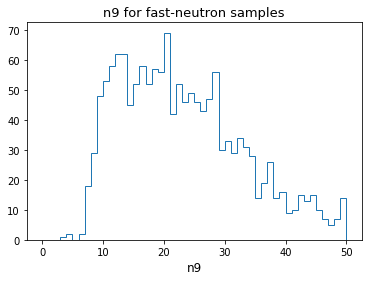

In [49]:
plt.hist(df['n9'], 
         bins=np.linspace(0,50,51), 
        histtype='step')
plt.xlabel('n9', fontsize=12)
plt.title('n9 for fast-neutron samples', fontsize=13)
# plt.yscale('log')
plt.show()

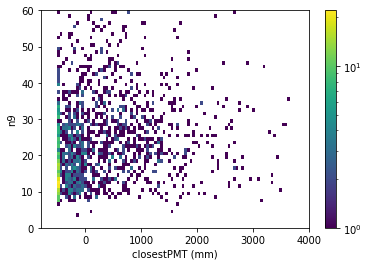

In [50]:
plt.hist2d(df['closestPMT'], df['n9'], 
           bins=[np.linspace(-800,4000,100), np.linspace(0,60,61)],
           cmin=1, norm=LogNorm()
          )
plt.colorbar()
plt.xlabel('closestPMT (mm)')
plt.ylabel('n9')
plt.show()

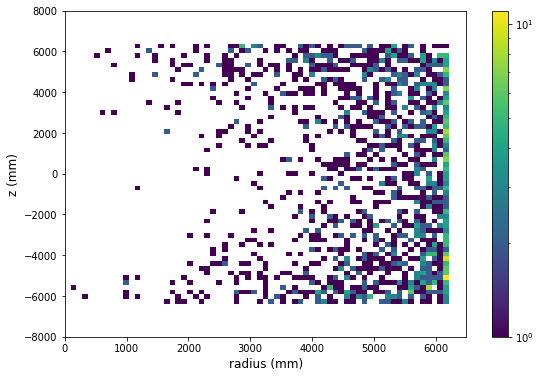

In [52]:
plt.figure(figsize=(9,6))
plt.hist2d(np.sqrt(df['x']**2+df['y']**2), 
            df['z'], 
            cmin=0, norm=LogNorm(), 
            bins=[np.linspace(0,6500,70), np.linspace(-8000,8000,70)]
           )
plt.colorbar()

plt.ylabel('z (mm)', fontsize=12)
plt.xlabel('radius (mm)', fontsize=12)
plt.show()

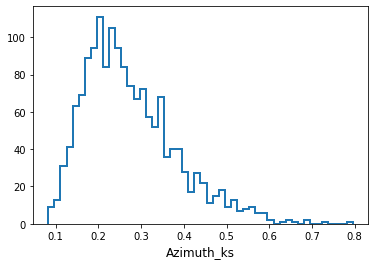

In [53]:
plt.hist(df['azimuth_ks'], bins=50, 
         histtype='step', linewidth=2)
plt.xlabel('Azimuth_ks', fontsize=12)
plt.show()

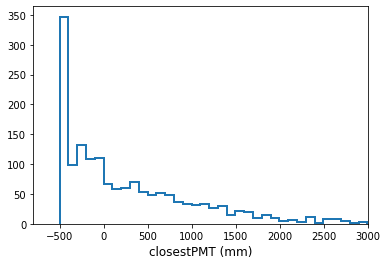

In [54]:
plt.hist(df['closestPMT'], bins=50, 
        histtype='step', linewidth=2)
plt.xlim(-800, 3000)
plt.xlabel('closestPMT (mm)', fontsize=12)
plt.show()

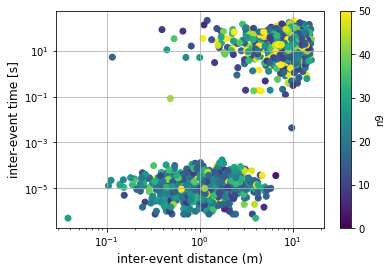

In [43]:
plt.scatter(df['drPrevr']/1e3, df['dt_prev_us']/1e6, 
            c=df['n9'], 
           vmin=0, vmax=50, 
           )
plt.colorbar(label='n9', )
plt.xlabel('inter-event distance (m)', fontsize=12)
plt.ylabel('inter-event time [s]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid()

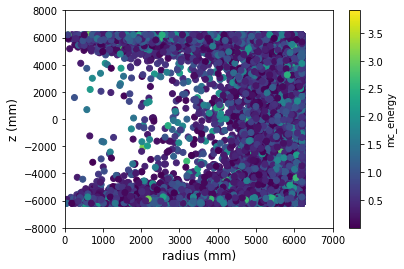

In [60]:
plt.scatter(np.sqrt(df['x']**2+df['y']**2), 
            df['z'], 
            c=df['mc_energy'], #vmin=0, vmax=50
           )
plt.colorbar(label='mc_energy')
plt.xlim(0, 7000)
plt.ylim(-8000, 8000)
plt.ylabel('z (mm)', fontsize=12)
plt.xlabel('radius (mm)', fontsize=12)
plt.show()

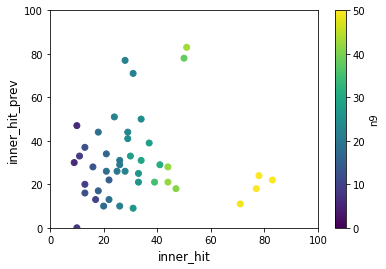

In [72]:
plt.scatter(df['inner_hit'], df['inner_hit_prev'], 
           c=df['n9'], vmin=0, vmax=50)
plt.colorbar(label='n9')
plt.xlabel('inner_hit', fontsize=12)
plt.ylabel('inner_hit_prev', fontsize=12)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

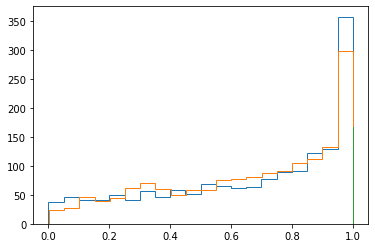

In [44]:
plt.hist(df['w']**2+df['v']**2, bins=20, histtype='step')
plt.hist(df['u']**2+df['v']**2, bins=20, histtype='step')
plt.hist(df['u']**2+df['w']**2+df['v']**2, bins=20, histtype='step')
# plt.xlim(0,1e4)
plt.show()

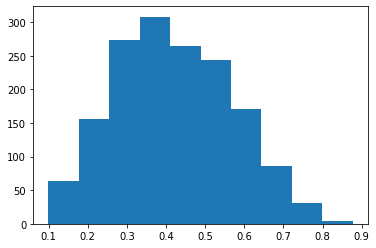

In [45]:
plt.hist(df['good_dir'])
plt.show()

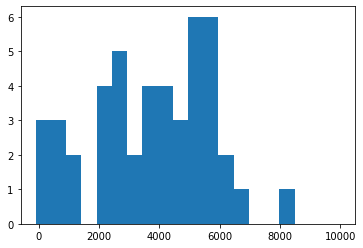

In [27]:
plt.hist(df['drmcr'], bins=20, range=[-1e2,1e4])
# plt.xlim(0,1e4)
plt.show()

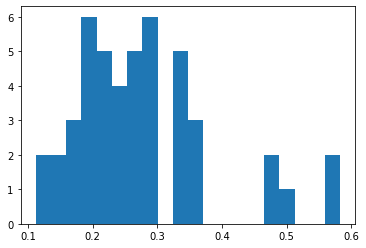

In [29]:
plt.hist(df['azimuth_ks'], bins=20)
# plt.xlim(0,1e4)
plt.show()

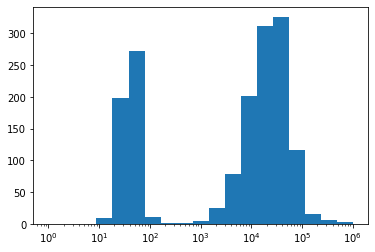

In [46]:
plt.hist(df['dt_sub'], bins=np.logspace(0,6,20))
# plt.xlim(0,1e4)
plt.xscale('log')
plt.show()

-------

## Electrons 

In [55]:
FILE_NAME = 'data/e-_10runs.pkl'
df = pd.read_pickle(FILE_NAME)

In [56]:
df.head()

,gtid,mcid,code,muon_flag,subid,inner_hit_prev,inner_hit,inner_hit_next,id_plus_dr_hit,veto_hit,veto_plus_dr_hit,veto_hit_prev,pe,innerPE,vetoPE,n9_prev,n9,n9_next,nOff,n100_prev,n100,n100_next,n400_prev,n400,n400_next,nX_prev,nX,nX_next,good_pos_prev,good_pos,good_pos_next,good_dir_prev,good_dir,good_dir_next,x,y,z,t,u,v,w,azimuth_ks_prev,azimuth_ks,azimuth_ks_next,distpmt,mc_energy,mcx,mcy,mcz,mct,mcu,mcv,mcw,closestPMT_prev,closestPMT,closestPMT_next,dxPrevx,dyPrevy,dzPrevz,drPrevr,dxNextx,dyNexty,dzNextz,drNextr,dxmcx,dymcy,dzmcz,drmcr,dt_sub,dt_prev_us,dt_next_us,timestamp,num_tested,best_like,worst_like,average_like,average_like_05m
0,1,0,4,0,0,0,0,0,26,0,0,0,39.579155,39.579157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,13690.740720,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+09,1.000000e+09,1.000000e+09,1.732051e+09,-1.000000e+09,-1.000000e+09,-1.000000e+09,1.732051e+09,57.959166,-185.737948,290.224465,349.411062,5.288463,0.0,0.0,0.0,236,-4.223670,-40.882736,-17.511869,-18.188574
1,2,11,4,0,0,0,0,21,47,0,0,0,41.121178,41.121178,0.0,0.0,0.0,20.0,2.0,0.0,0.0,22.0,0.0,0.0,22.0,0.0,0.0,20.0,0.000000,0.000000,0.883755,0.000000,0.000000,0.605404,-1.000000e+09,-1.000000e+09,-1.000000e+09,0.0,-1.000000e+09,-1.000000e+09,-1.000000e+09,0.000000,0.000000,0.139502,1495.425735,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1128.841248,-1.000000e+09,-1.000000e+09,-1.000000e+09,1.732051e+09,9.999962e+08,1.000001e+09,1.000000e+09,1.732049e+09,-113.876384,18.640591,300.140618,321.558226,13.413751,0.0,0.0,16665825.0,233,-9.319669,-136.875305,-69.215469,-75.405182
2,4,16,4,0,0,0,21,36,49,0,0,0,38.583595,38.583597,0.0,0.0,20.0,32.0,0.0,0.0,22.0,36.0,0.0,22.0,39.0,0.0,20.0,32.0,0.000000,0.883755,0.850329,0.000000,0.605404,0.568638,-3.810595e+03,1.166471e+03,-4.571159e+03,0.0,-6.942664e-01,1.036142e-01,-7.122208e-01,0.000000,0.139502,0.272968,2303.426648,5.0,-3868.554564,1352.209200,-4861.383218,0.0,-0.889960,0.075427,-0.449757,0.000000,1128.841248,976.483765,9.999962e+08,1.000001e+09,9.999954e+08,1.732047e+09,3.894418e+03,2.185365e+03,-9.999954e+08,9.999954e+08,225.784885,-94.369620,-118.586225,271.932220,22.312262,0.0,16665825.0,25244478.5,268,-19.060568,-151.555099,-84.415993,-87.055618
3,6,21,4,0,0,21,36,38,36,0,0,0,30.056547,30.056547,0.0,20.0,32.0,30.0,0.0,22.0,36.0,38.0,22.0,39.0,44.0,20.0,32.0,30.0,0.883755,0.850329,0.806279,0.605404,0.568638,0.372439,8.382263e+01,3.351836e+03,4.723516e+03,0.0,5.495608e-01,5.211520e-01,-6.529804e-01,0.139502,0.272968,0.251468,4727.231585,5.0,197.699016,3333.195346,4423.375618,0.0,0.811225,0.030550,-0.583936,1128.841248,976.483765,1992.552490,3.894418e+03,2.185365e+03,9.294675e+03,1.031180e+04,4.411297e+01,-1.330420e+03,-9.294675e+03,9.389513e+03,158.132648,-66.099628,166.761090,239.132508,11.805562,16665825.0,8578653.5,27727239.0,266,-28.006727,-106.378212,-58.994717,-60.563168
4,7,30,4,0,0,36,38,26,53,0,0,0,47.228909,47.228907,0.0,32.0,30.0,23.0,1.0,36.0,38.0,26.0,39.0,44.0,27.0,32.0,30.0,23.0,0.850329,0.806279,0.889123,0.568638,0.372439,0.351614,1.279356e+02,2.021416e+03,3.707448e+03,0.0,-4.798281e-01,-1.465389e-01,-8.650384e-01,0.272968,0.251468,0.338472,3460.002930,5.0,-97.849285,2115.785330,3826.033735,0.0,-0.265113,-0.021759,-0.963972,976.483765,1992.552490,1538.747173,4.411297e+01,-1.330420e+03,-1.016069e+03,1.674622e+03,-8.180464e+02,2.082213e+03,1.016069e+03,2.457073e+03,-129.749998,156.867566,408.046220,456.009005,7.152002,8578653.5,2482760.5,34984119.5,189,-2.596447,-125.846825,-57.377041,-60.907608


### Clean out the non-constructed events

In [57]:
def clean_data(df):
    df_cleaned = df[df['azimuth_ks']>=0.]
    print('Initial events: %i\nAfter removing non-triggers: %i'%(len(df), len(df_cleaned)))
    return df_cleaned

In [58]:
df = clean_data(df)

Initial events: 54840
After removing non-triggers: 54840


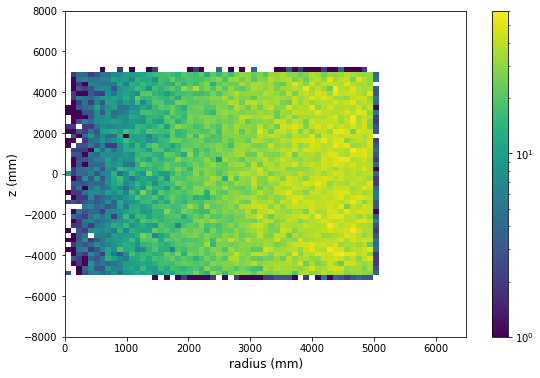

In [63]:
plt.figure(figsize=(9,6))
plt.hist2d(np.sqrt(df['x']**2+df['y']**2), 
            df['z'], 
            cmin=0, norm=LogNorm(), 
            bins=[np.linspace(0,6500,70), np.linspace(-8000,8000,70)]
           )
plt.colorbar()

plt.ylabel('z (mm)', fontsize=12)
plt.xlabel('radius (mm)', fontsize=12)
plt.show()

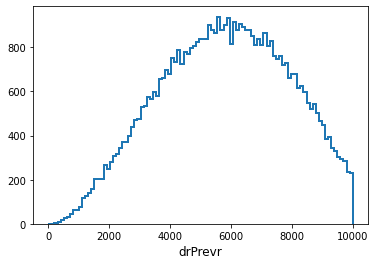

In [67]:
plt.hist(df['drPrevr'], bins=np.linspace(0,1e4,100), 
         histtype='step', linewidth=2)
plt.xlabel('drPrevr', fontsize=12)
plt.show()

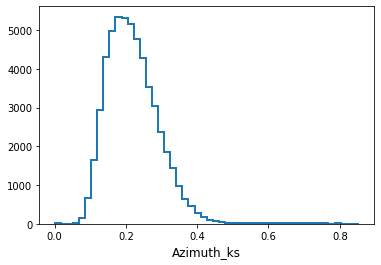

In [61]:
plt.hist(df['azimuth_ks'], bins=50, 
         histtype='step', linewidth=2)
plt.xlabel('Azimuth_ks', fontsize=12)
plt.show()

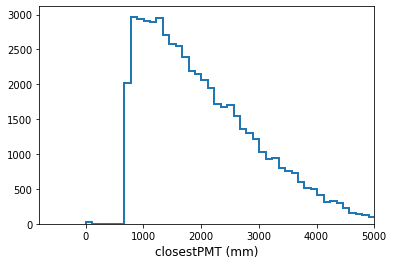

In [64]:
plt.hist(df['closestPMT'], bins=50, 
        histtype='step', linewidth=2)
plt.xlim(-800, 5000)
plt.xlabel('closestPMT (mm)', fontsize=12)
plt.show()